<a href="https://colab.research.google.com/github/sangmin1120/AI_Introduction/blob/main/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%8B%A8%EB%B3%80%EB%9F%89_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. import library

In [ ]:
# numpy. pandas . drive
import numpy as np
import pandas as pd
from google.colab import drive

# 2. mount drive

In [ ]:
drive.mount('/smuai2024')

Drive already mounted at /smuai2024; to attempt to forcibly remount, call drive.mount("/smuai2024", force_remount=True).


# 3. upload file

In [ ]:
from google.colab import files
files.upload()

# 4. read csv file

In [ ]:
# csv file --> python 에서 쓸 수 있는 data format으로 변환 : pandas
nbastat = pd.read_csv('nbastat2022.csv')
nbastat

In [ ]:
# 슛을 몇 개 시도해서 몇 개 성공했는 지를 알고싶음.
# 모든 데이터에는 결측값(오류)가 있음. => 0으로 처리해야한다.

# 5. 줄 수 count

In [ ]:
m = len(nbastat) # m : 데이터의 수, sample의 수
m

249

# 6. feature selection --> nbastat에서 FGA,FGM만 추출

In [ ]:
# FGA : 몇 개의 슛을 던지는지
# FGM : 몇 개의 슛을 성공하는지
# nbastat의 많은 column 들 중에서 이 값들만 추출해서 사용
X = nbastat[['FGA']]
Y = nbastat[['FGM']]
print(X)
print(Y)

# 7. 결측값을 처리


In [ ]:
# pandas에서 결측값을 해소하는 함수 : fillna
X = X.fillna(0)
Y = Y.fillna(0)
type(X)

# 8. pandas의 datafram --> np의 array로 변환

In [ ]:
X = (np.array(X)).reshape(m,1)
Y = (np.array(Y)).reshape(m,1)
print(X)
type(X)

# 9. 그려보기 (확인)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X,Y,'.b')
plt.xlabel("FGA")
plt.ylabel("FGM")

# 10. 학습 준비

In [ ]:
# 학습률 : learning rate (얼마나 빨리 학습을 할 것인가)
learning_rate = 0.0001

# 훈련 횟수 : epochs
n_iter = 200

# 11. 초기화

In [ ]:
# theta와 theta의 미분 (gradient)를 초기화 --> 0으로 초기화
theta = np.zeros((2,1))
gradients = np.zeros((2,1))

# 12. 변수 설정

In [ ]:
# Xb를 설정 --> Xb = (1 X)의 결합
X0 = np.ones((m,1))
Xb = np.c_[X0,X]

print(Xb)

# 13. 훈련

In [ ]:
for i in range(n_iter):
  # 1. Xb*theta --> Xb.dot(theta) --> (249,2) * (2,1) --> (249,1)
  # 2. Xb*theta - Y --> Xb.dot(theta) - Y --> (249,1) - (249,1) --> (249,1)
  # 3. (Xb*theta - Y)*Xb --> (249,1) * (249,2)
  # --> Xb^I * (Xb*theta - Y) --> (2,249) * (249,1) --> (2,1)
  gradients = (1.0/m)*Xb.T.dot(Xb.dot(theta)-Y) # (2,1)
  theta = theta - learning_rate * gradients

In [ ]:
theta

array([[0.03517548],
       [0.41092642]])

# 14. 결과 가시화

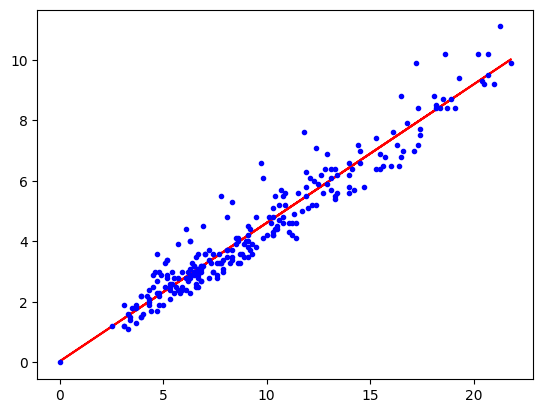

In [ ]:
# (X,Y)의 데이터와 Y = theta_0 + X*theta_1 인공지능 모델식
Y_pred = Xb.dot(theta)
plt.plot(X,Y_pred,color='Red')
plt.plot(X,Y,'.b')
# n_iter(훈련의 횟수)를 조절해서 theta를 정확하게 구한다.